In [80]:
import libpysal
import segregation
import geopandas as gpd
import matplotlib.pyplot as plt
from segregation.local import MultiLocationQuotient, MultiLocalDiversity, MultiLocalEntropy, MultiLocalSimpsonInteraction, MultiLocalSimpsonConcentration, LocalRelativeCentralization
from cenpy import products
%matplotlib inline

In [81]:
ohio13= products.ACS(2013).from_place('Cleveland, OH', level='tract',variables=['B02001','B03001','B25121','B06009'])
ohio15= products.ACS(2015).from_place('Cleveland, OH', level='tract',variables=['B02001','B03001','B25121','B06009'])
ohio17= products.ACS(2017).from_place('Cleveland, OH', level='tract',variables=['B02001','B03001','B25121','B06009'])
ohio19= products.ACS(2019).from_place('Cleveland, OH', level='tract',variables=['B02001','B03001','B25121','B06009'])

HTTPError: 500 Server Error: Internal Server Error for url: https://api.census.gov/data/2013/acs/acs5/variables.json

Text(0.5, 1.0, 'Total Black 2013')

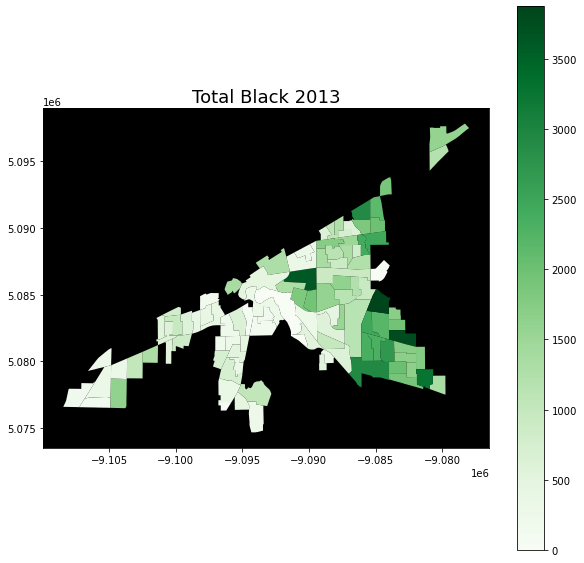

In [7]:
f, ax = plt.subplots(1,1,figsize=(10,10))
ohio13.dropna(subset=['B02001_003E'], axis=0).plot('B02001_003E', ax=ax, cmap='Greens',legend=True)
ax.set_facecolor('k')
ax.set_title('Total Black 2013', fontsize = 18)

In [6]:
years = [ohio13,ohio15,ohio17,ohio19]
for year in years:
    #low and high income
    year['low_in']= year['B25121_002E']+year['B25121_017E']+year['B25121_032E']
    year['mid_in'] = year['B25121_047E']+year['B25121_062E']+year['B25121_077E']
    #Education HS or lower, BD or higher
    year['HS_max']= year['B06009_002E']+year['B06009_003E']
    year['BD_min'] = year['B06009_005E']+year['B06009_006E']

Text(0.5, 1.0, 'Total low in 2013')

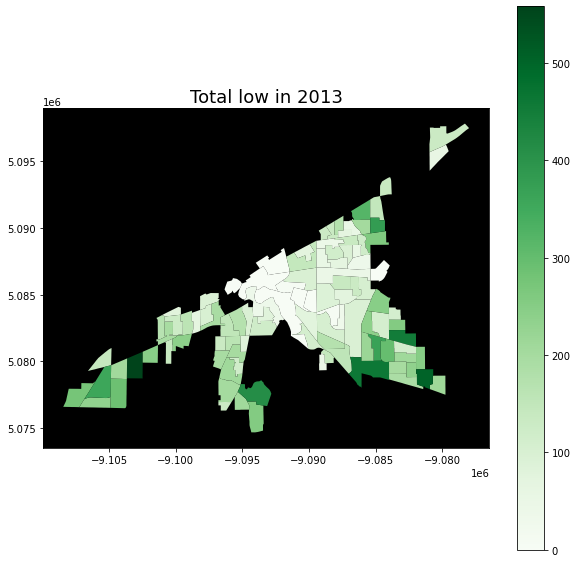

In [13]:
f, ax = plt.subplots(1,1,figsize=(10,10))
ohio13.dropna(subset=['low_in'], axis=0).plot('low_in', ax=ax, cmap='Greens',legend=True)
ax.set_facecolor('k')
ax.set_title('Total low in 2013', fontsize = 18)

In [7]:
#Composition
for year in years:
    #white
    year['white_com']=year['B02001_002E']/year['B02001_001E']
    #black
    year['black_com']=year['B02001_003E']/year['B02001_001E']
    #hispanic
    year['hisp_com']=year['B03001_003E']/year['B02001_001E']
    #lowincome
    year['low_com']=year['low_in']/year['B25121_001E']
    #midincome
    year['mid_com']=year['mid_in']/year['B25121_001E']
    #highincome
    year['high_com']=year['B25121_092E']/year['B25121_001E']
    #HS or less
    year['HS_com']=year['HS_max']/year['B06009_001E']
    #BD min
    year['BD_com']=year['BD_min']/year['B06009_001E']

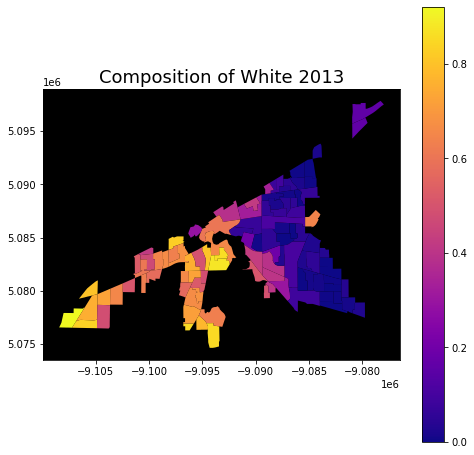

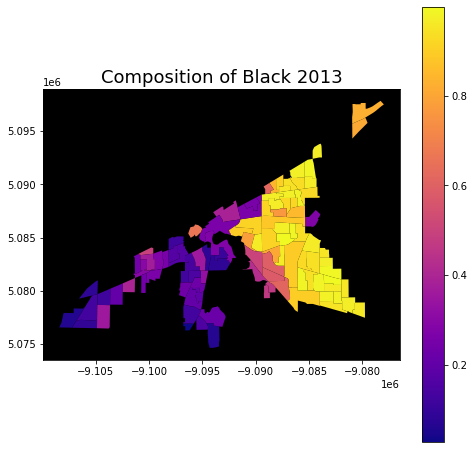

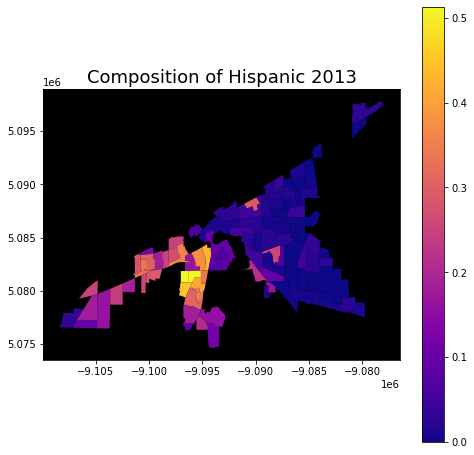

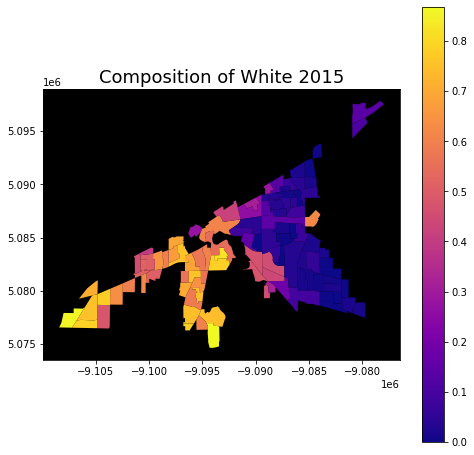

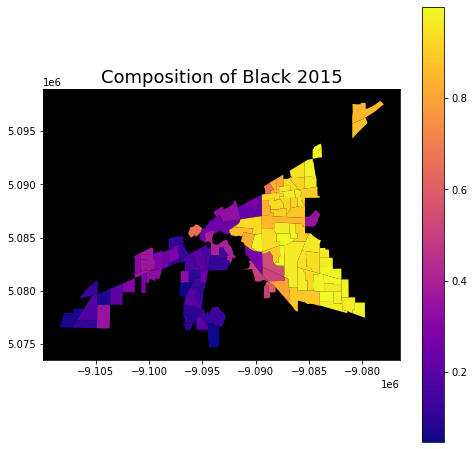

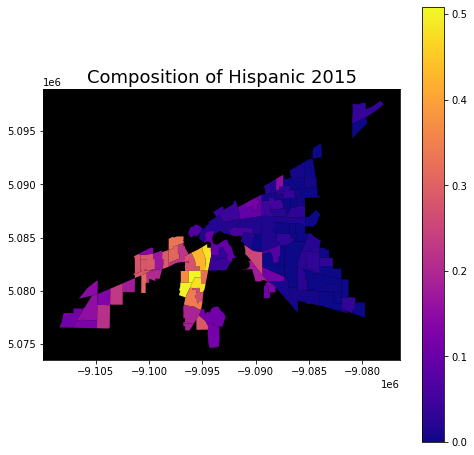

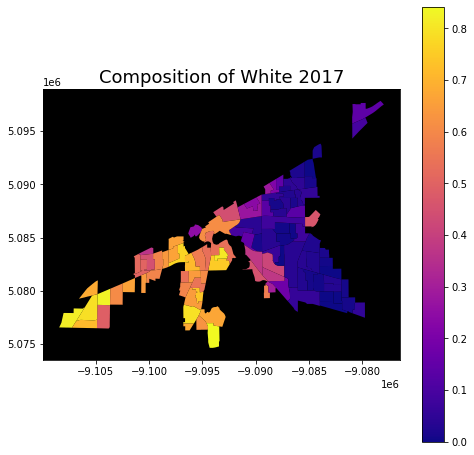

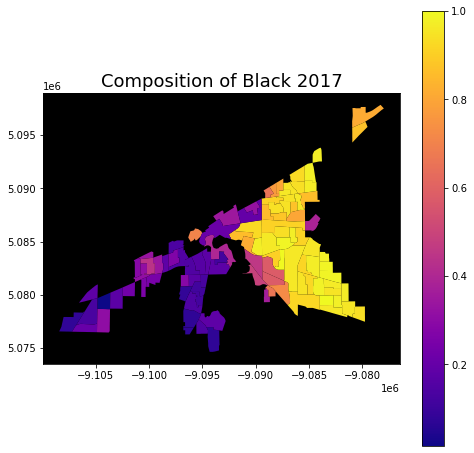

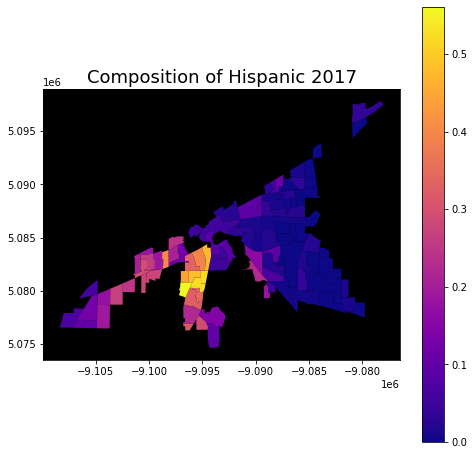

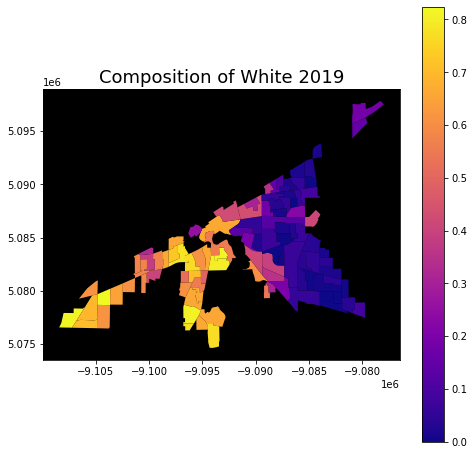

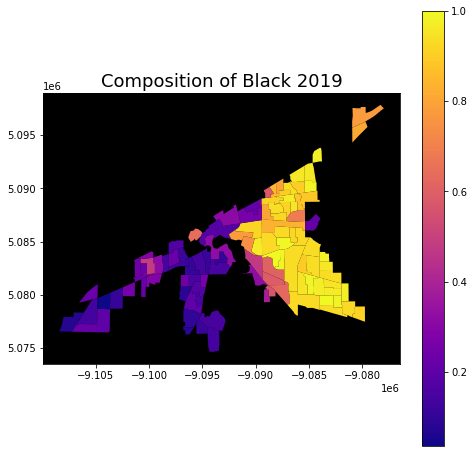

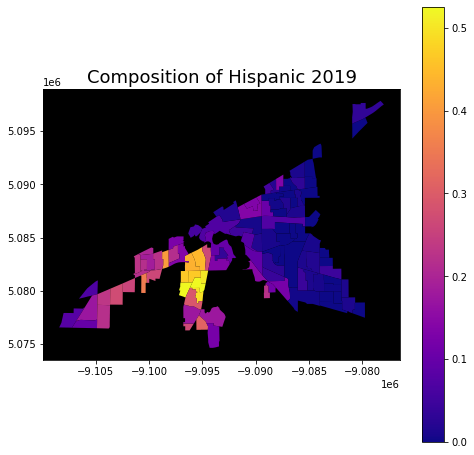

In [49]:
#Race
time= [2013,2015,2017,2019]
for year, time in zip(years,time):
    #White
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.dropna(subset=['white_com'], axis=0).plot('white_com', ax=ax, cmap='plasma',legend=True)
    ax.set_facecolor('k')
    ax.set_title('Composition of White {}'.format(time), fontsize = 18)
    #Black
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.dropna(subset=['black_com'], axis=0).plot('black_com', ax=ax, cmap='plasma',legend=True)
    ax.set_facecolor('k')
    ax.set_title('Composition of Black {}'.format(time) , fontsize = 18)
    #Hispanic
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.dropna(subset=['hisp_com'], axis=0).plot('hisp_com', ax=ax, cmap='plasma',legend=True)
    ax.set_facecolor('k')
    ax.set_title('Composition of Hispanic {}'.format(time) , fontsize = 18)

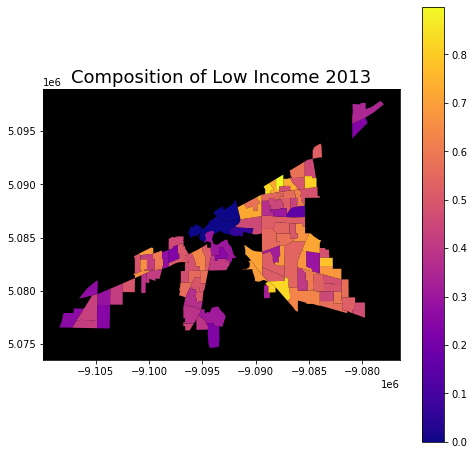

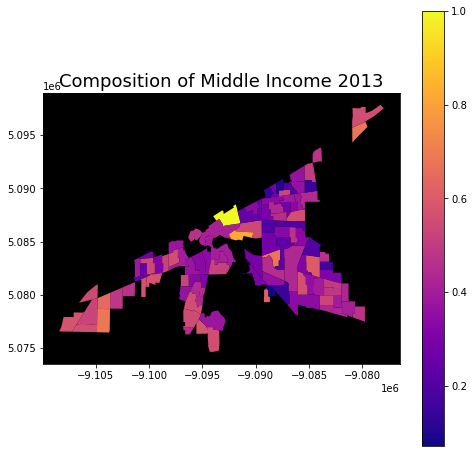

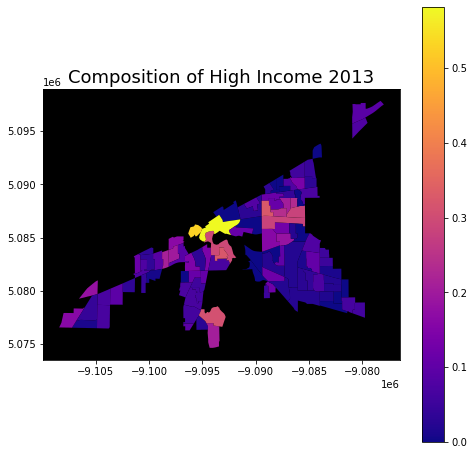

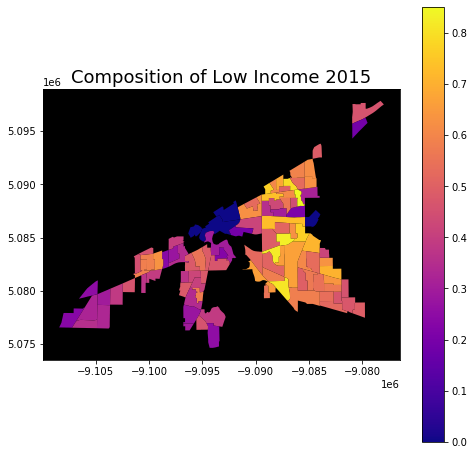

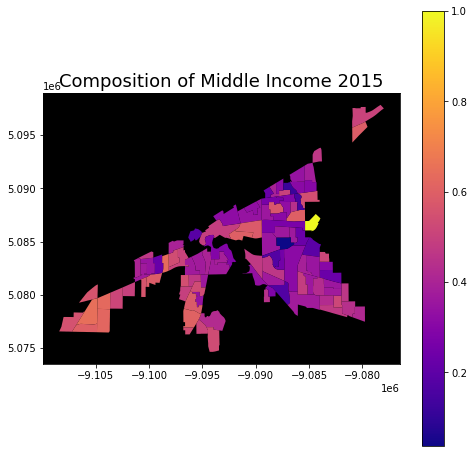

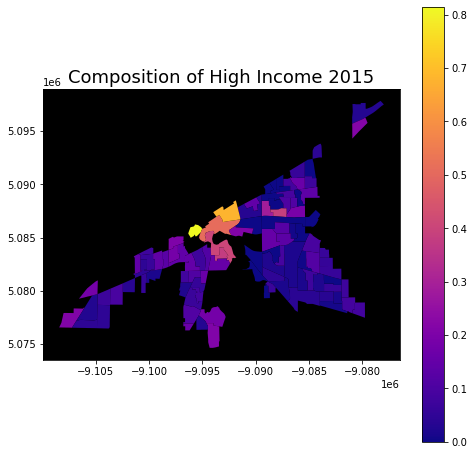

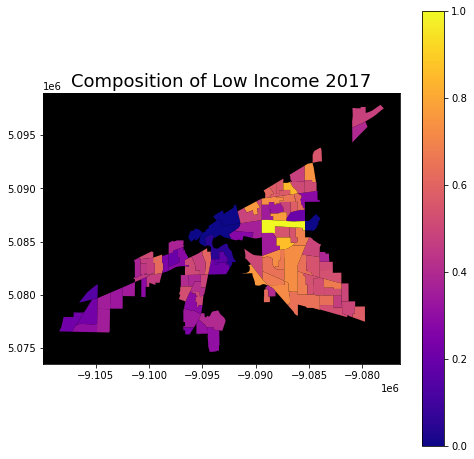

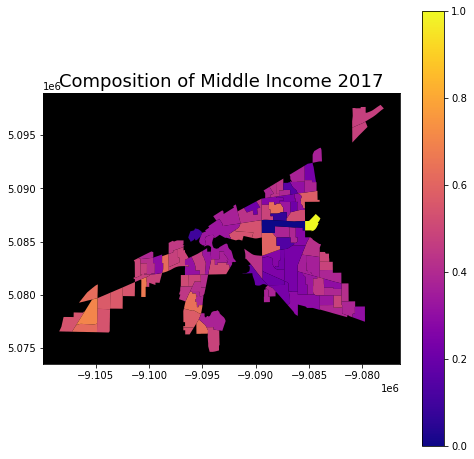

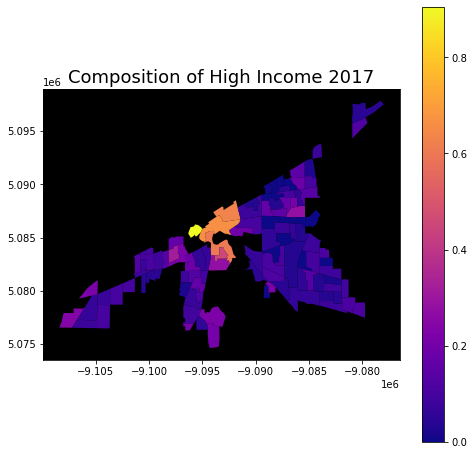

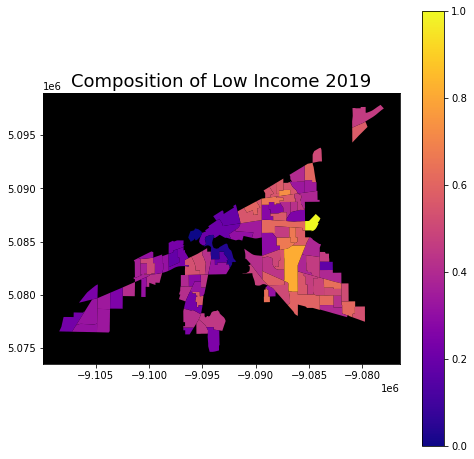

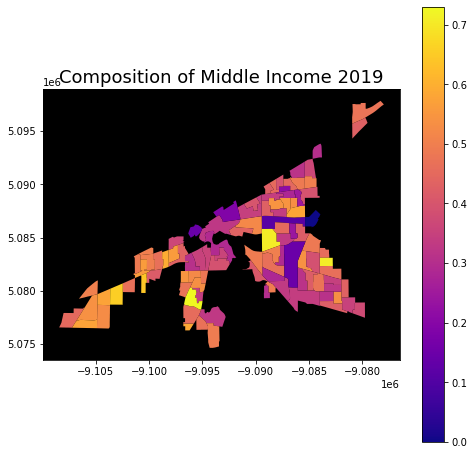

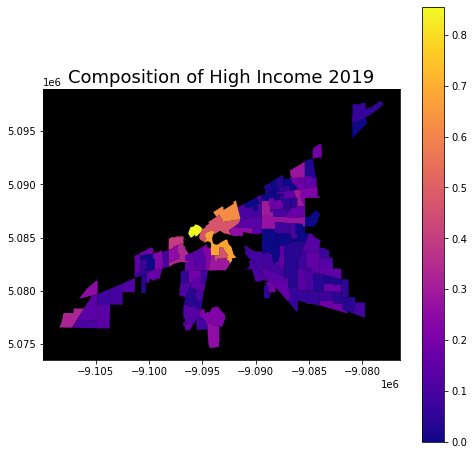

In [51]:
#Income 
time= [2013,2015,2017,2019]
for year, time in zip(years,time):
    #Low
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.dropna(subset=['low_com'], axis=0).plot('low_com', ax=ax, cmap='plasma',legend=True)
    ax.set_facecolor('k')
    ax.set_title('Composition of Low Income {}'.format(time), fontsize = 18)
    #Middle
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.dropna(subset=['mid_com'], axis=0).plot('mid_com', ax=ax, cmap='plasma',legend=True)
    ax.set_facecolor('k')
    ax.set_title('Composition of Middle Income {}'.format(time) , fontsize = 18)
    #High
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.dropna(subset=['high_com'], axis=0).plot('high_com', ax=ax, cmap='plasma',legend=True)
    ax.set_facecolor('k')
    ax.set_title('Composition of High Income {}'.format(time) , fontsize = 18)

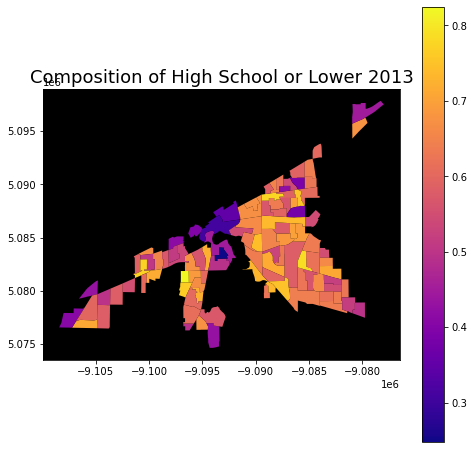

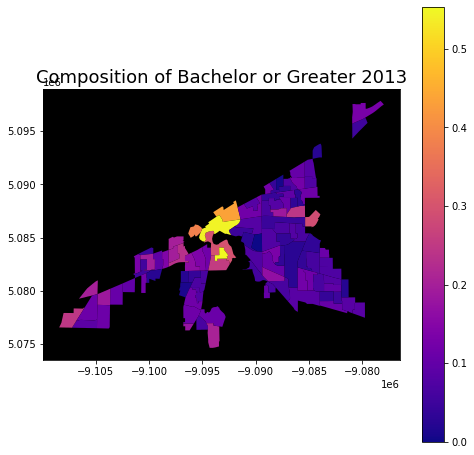

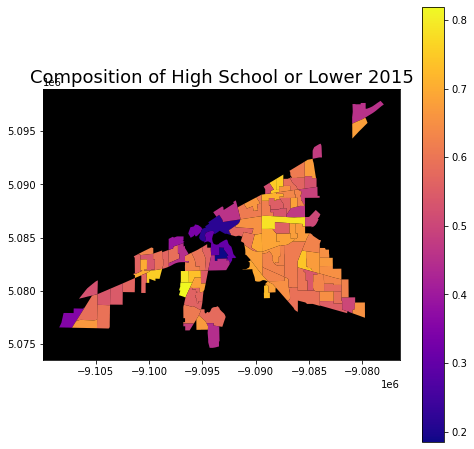

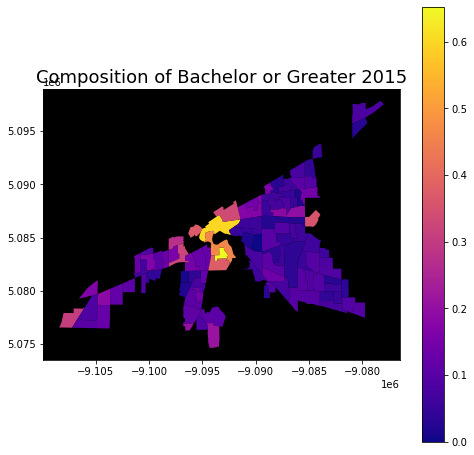

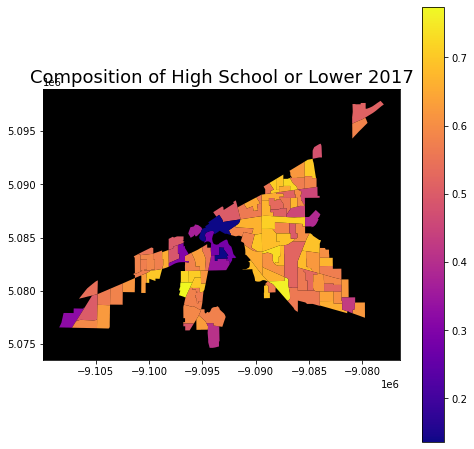

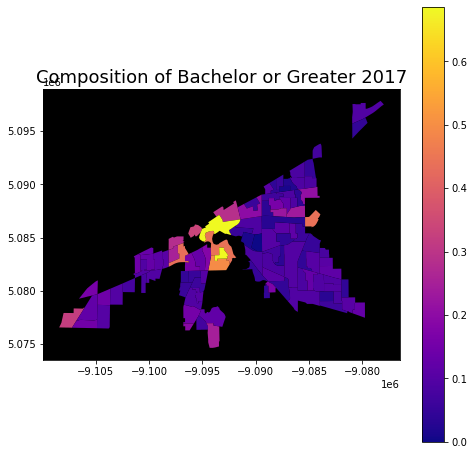

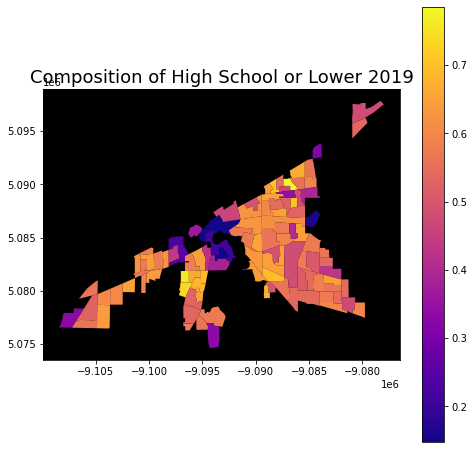

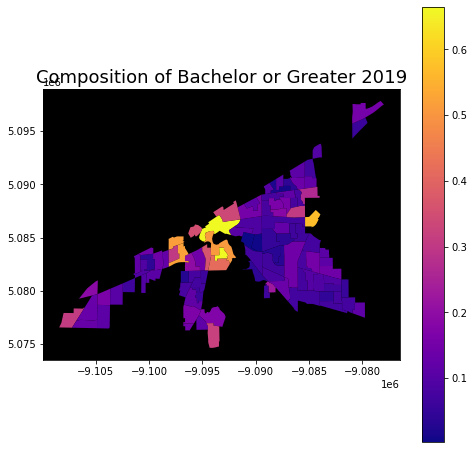

In [52]:
 #Education
time= [2013,2015,2017,2019]
for year, time in zip(years,time):
    #HS or lower
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.dropna(subset=['HS_com'], axis=0).plot('HS_com', ax=ax, cmap='plasma',legend=True)
    ax.set_facecolor('k')
    ax.set_title('Composition of High School or Lower {}'.format(time), fontsize = 18)
    #BD or higher
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.dropna(subset=['BD_com'], axis=0).plot('BD_com', ax=ax, cmap='plasma',legend=True)
    ax.set_facecolor('k')
    ax.set_title('Composition of Bachelor or Greater {}'.format(time) , fontsize = 18)

In [63]:
#Location Quotient
race= ['B02001_002E','B02001_003E','B03001_003E']
income = ['low_in','mid_in','B25121_092E']
edu=['HS_max','BD_min']

#race
LQ13r = MultiLocationQuotient(ohio13, race)
LQ13r_stat=LQ13r.statistics

LQ15r = MultiLocationQuotient(ohio15, race)
LQ15r_stat=LQ15r.statistics

LQ17r = MultiLocationQuotient(ohio17, race)
LQ17r_stat=LQ17r.statistics

LQ19r = MultiLocationQuotient(ohio19, race)
LQ19r_stat=LQ19r.statistics

#income
LQ13i = MultiLocationQuotient(ohio13, income)
LQ13i_stat=LQ13i.statistics

LQ15i = MultiLocationQuotient(ohio15, income)
LQ15i_stat=LQ15i.statistics

LQ17i = MultiLocationQuotient(ohio17, income)
LQ17i_stat=LQ17i.statistics

LQ19i = MultiLocationQuotient(ohio19, income)
LQ19i_stat=LQ19i.statistics

#education
LQ13e = MultiLocationQuotient(ohio13, edu)
LQ13e_stat=LQ13e.statistics

LQ15e = MultiLocationQuotient(ohio15, edu)
LQ15e_stat=LQ15e.statistics

LQ17e = MultiLocationQuotient(ohio17, edu)
LQ17e_stat=LQ17e.statistics

LQ19e = MultiLocationQuotient(ohio19, edu)
LQ19e_stat=LQ19e.statistics

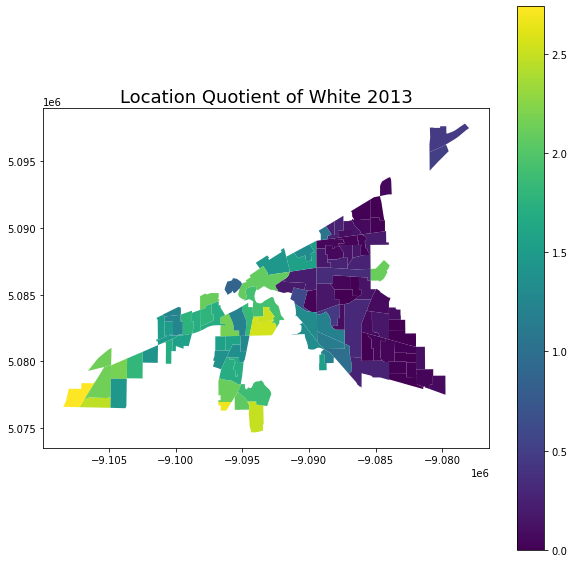

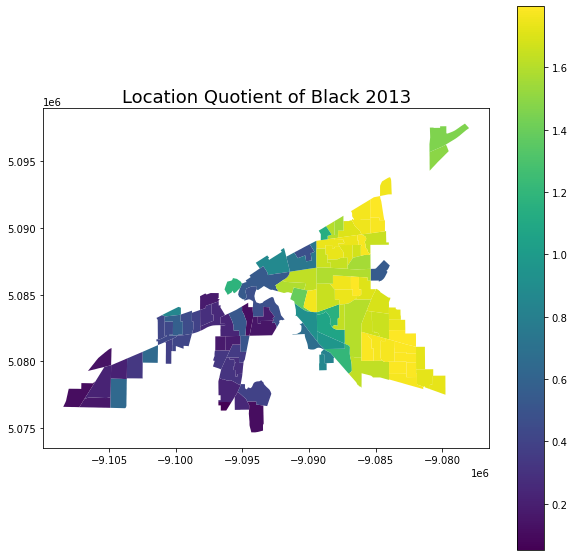

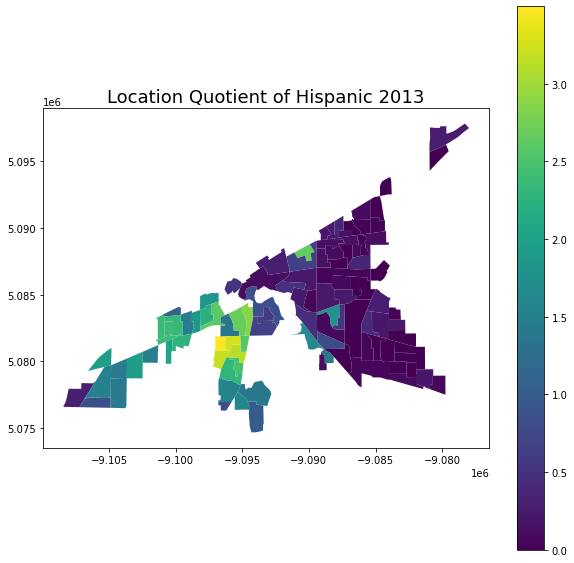

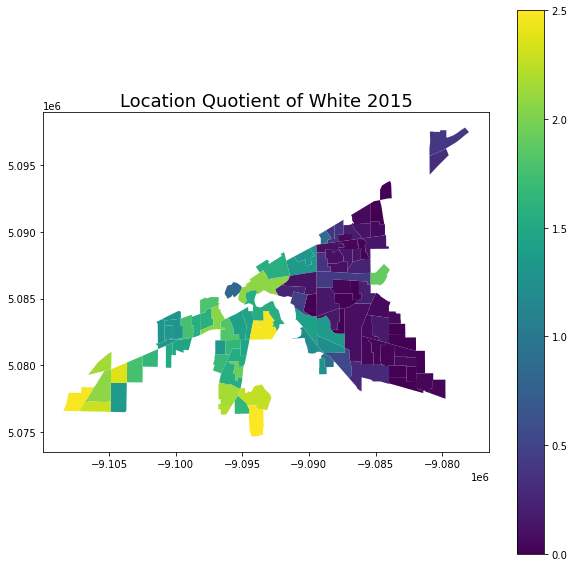

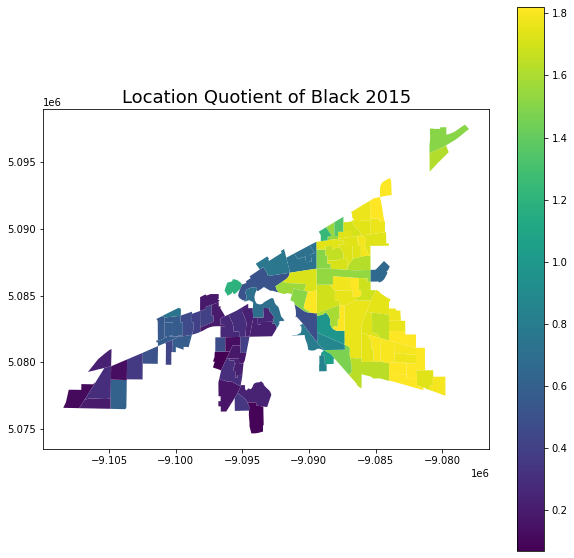

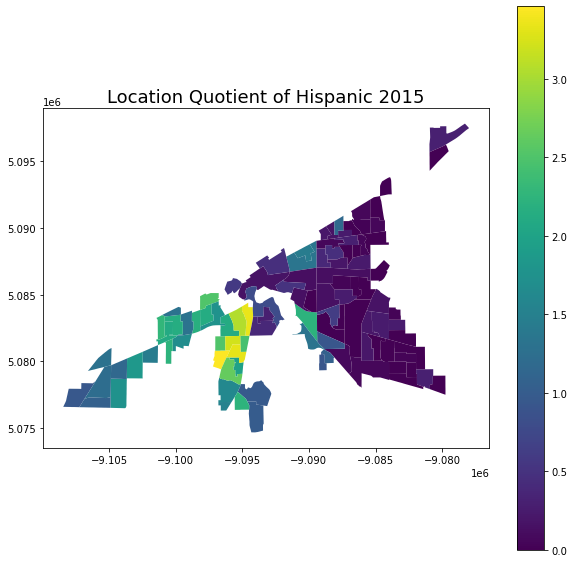

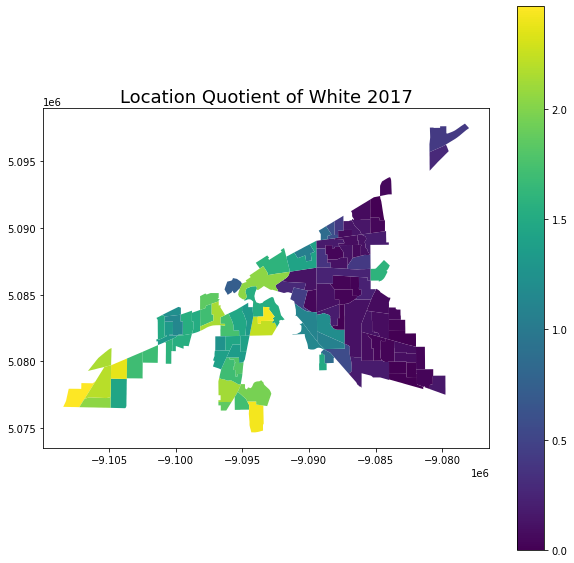

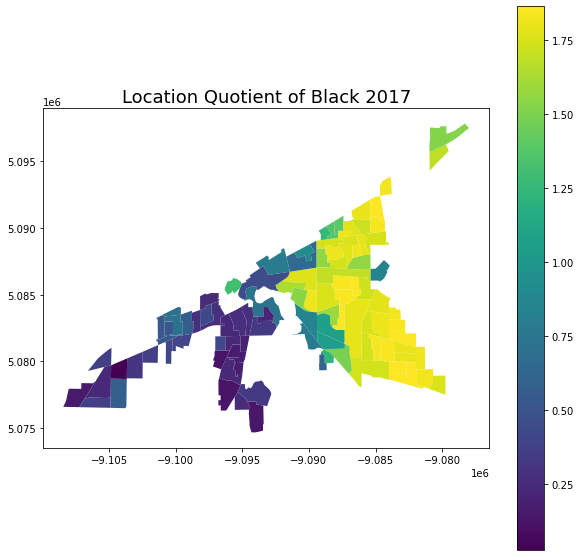

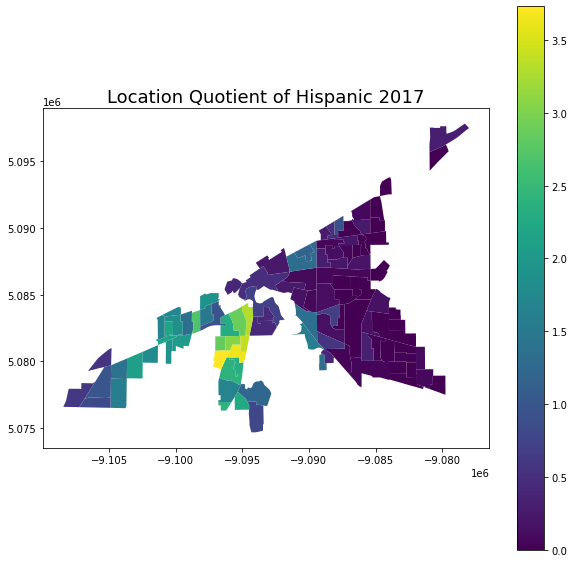

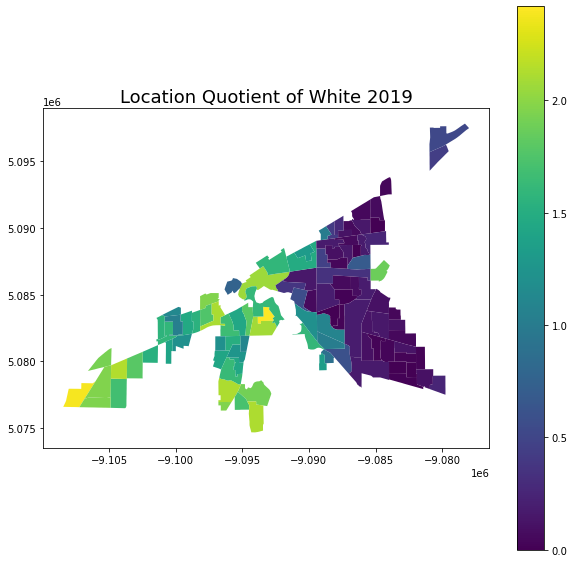

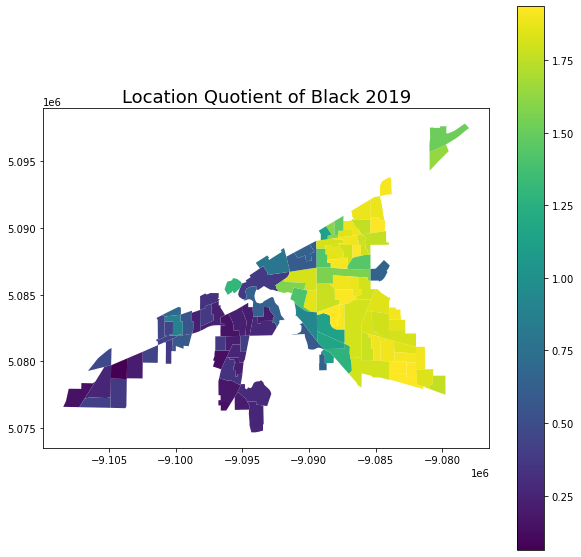

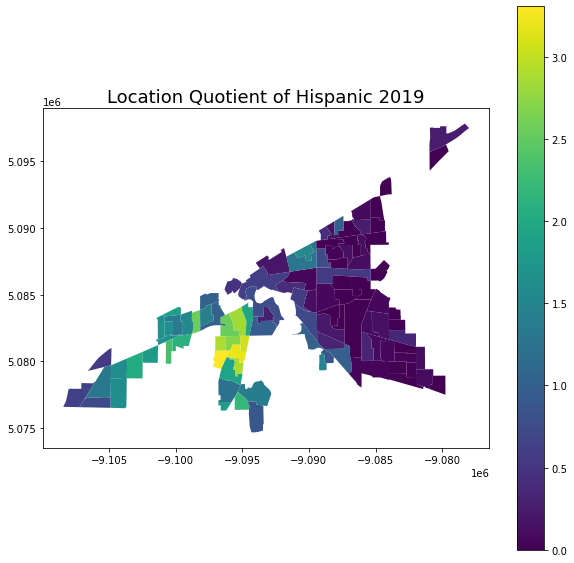

In [67]:
#Race
lqr_stat=[LQ13r_stat,LQ15r_stat,LQ17r_stat,LQ19r_stat]
time= [2013,2015,2017,2019]
for year,time,stat in zip(years,time,lqr_stat): 
    #White
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.plot(stat[:,0],cmap = 'viridis',legend = True, ax = ax)
    ax.set_title('Location Quotient of White {}'.format(time), fontsize = 18)
    #Black
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.plot(stat[:,1],cmap = 'viridis',legend = True, ax = ax)
    ax.set_title('Location Quotient of Black {}'.format(time), fontsize = 18)
    #Hispanic
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.plot(stat[:,2],cmap = 'viridis',legend = True, ax = ax)
    ax.set_title('Location Quotient of Hispanic {}'.format(time), fontsize = 18)

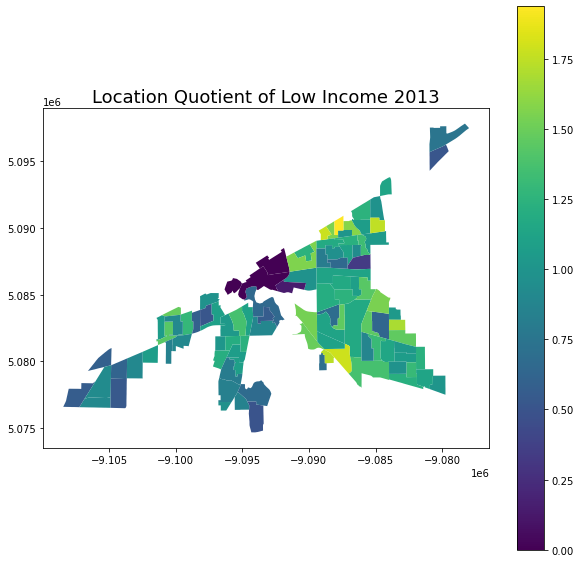

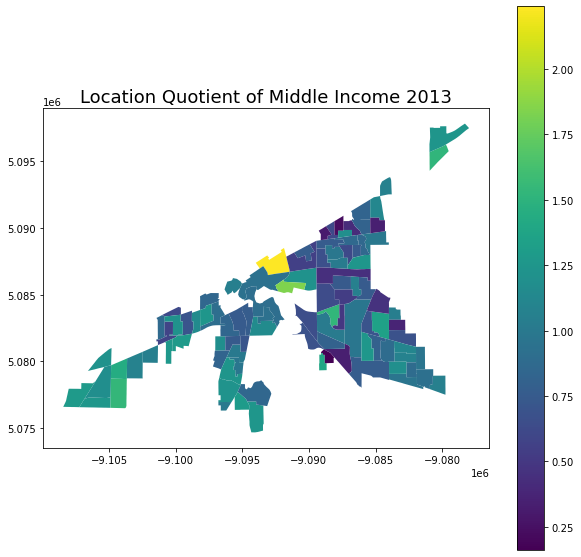

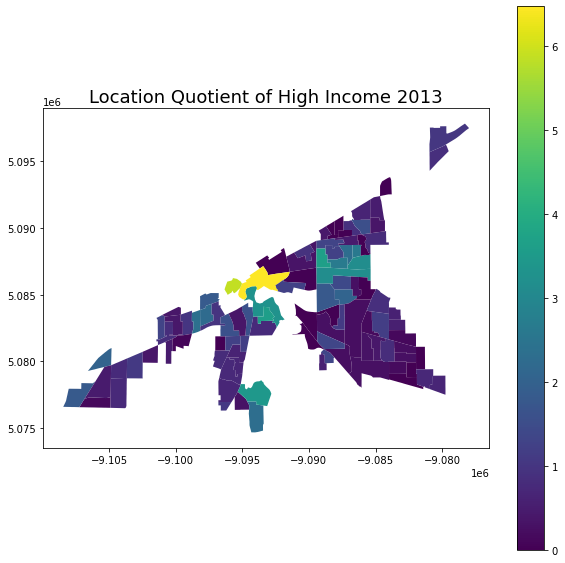

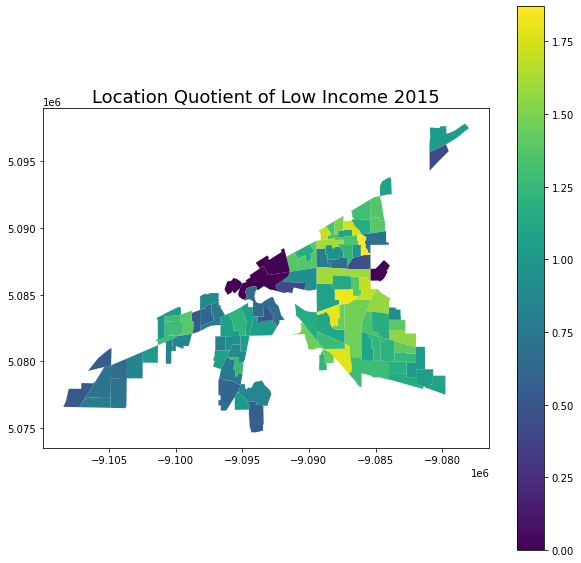

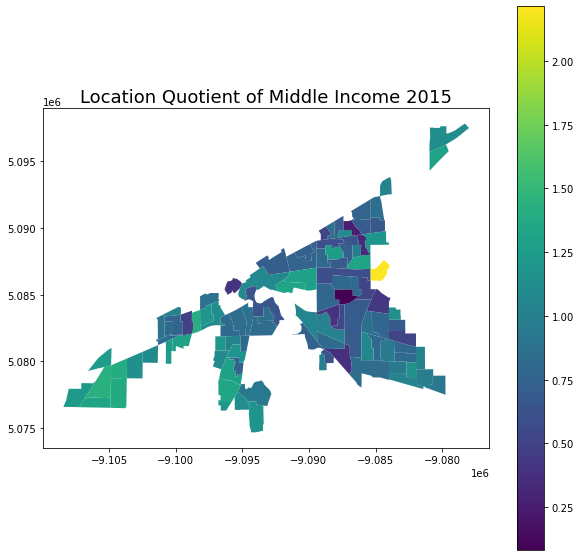

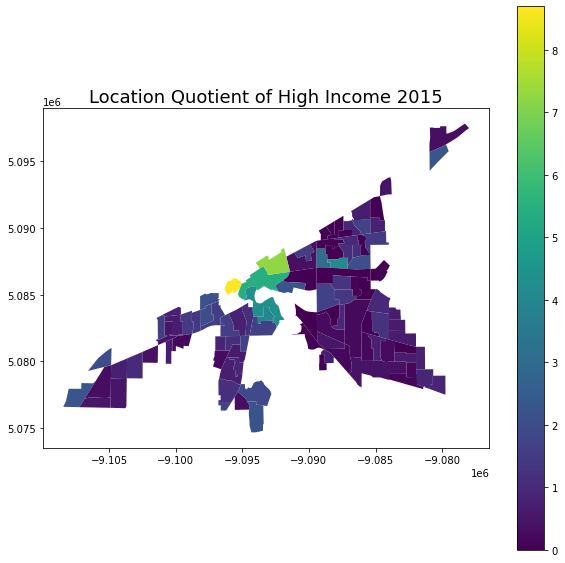

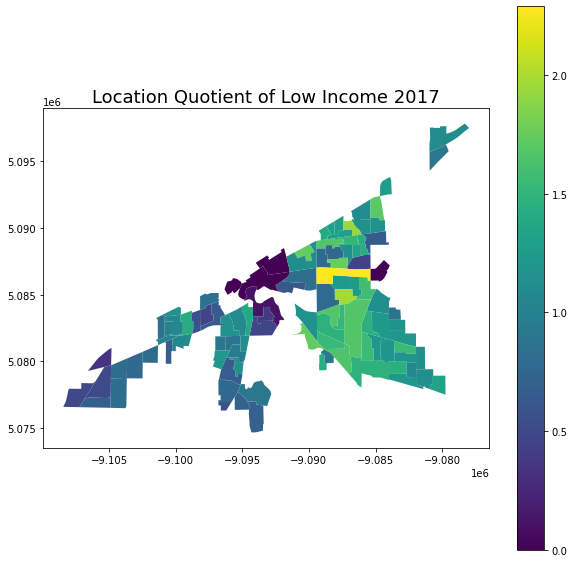

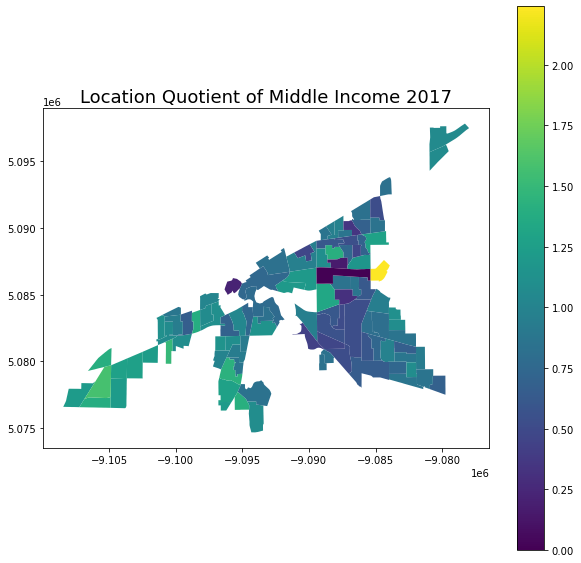

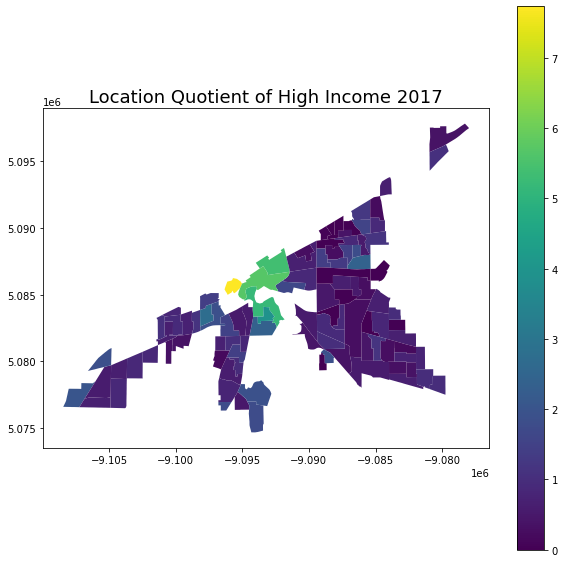

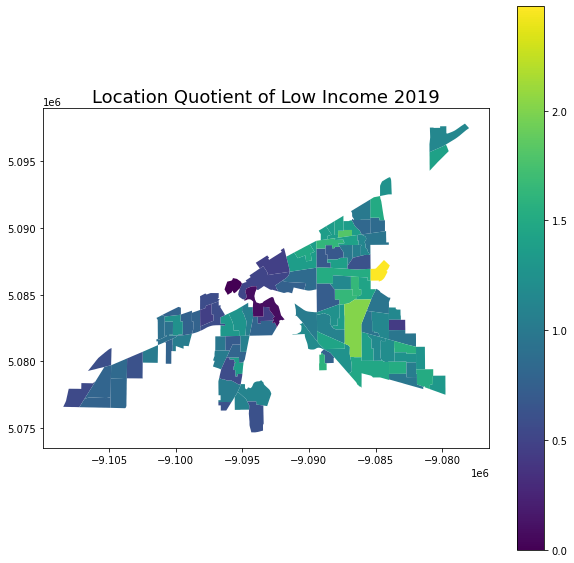

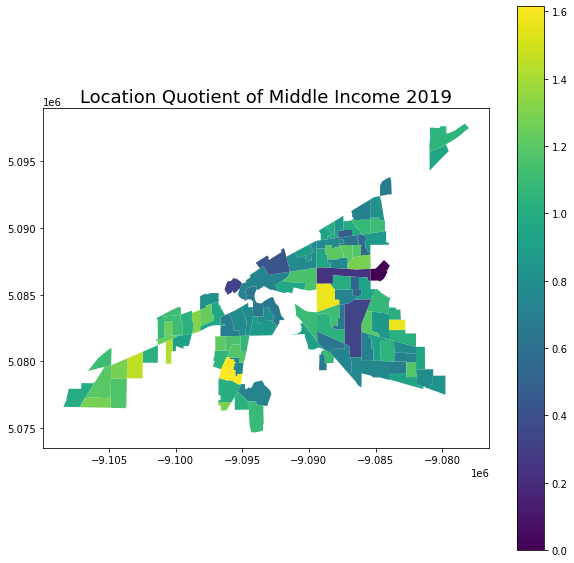

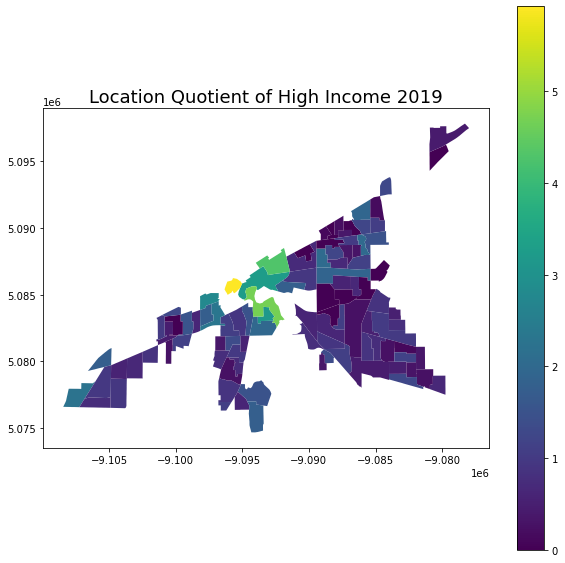

In [68]:
#Income
lqi_stat=[LQ13i_stat,LQ15i_stat,LQ17i_stat,LQ19i_stat]
time= [2013,2015,2017,2019]
for year,time,stat in zip(years,time,lqi_stat): 
    #Low
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.plot(stat[:,0],cmap = 'viridis',legend = True, ax = ax)
    ax.set_title('Location Quotient of Low Income {}'.format(time), fontsize = 18)
    #Middle
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.plot(stat[:,1],cmap = 'viridis',legend = True, ax = ax)
    ax.set_title('Location Quotient of Middle Income {}'.format(time), fontsize = 18)
    #High
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.plot(stat[:,2],cmap = 'viridis',legend = True, ax = ax)
    ax.set_title('Location Quotient of High Income {}'.format(time), fontsize = 18)

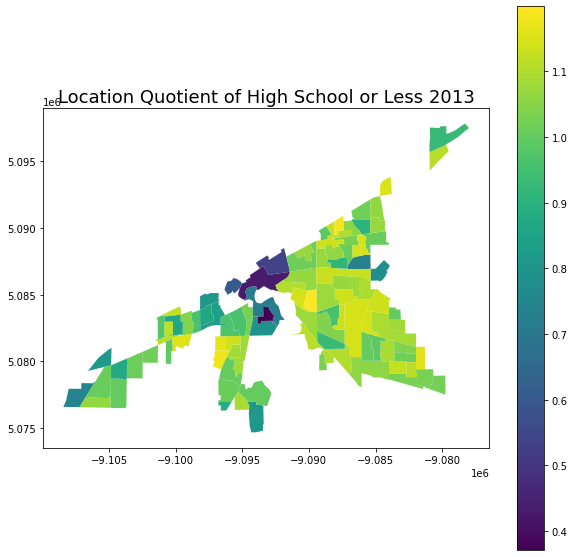

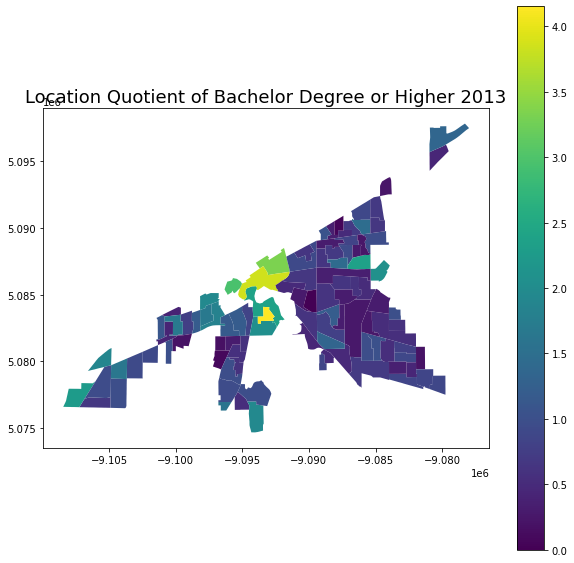

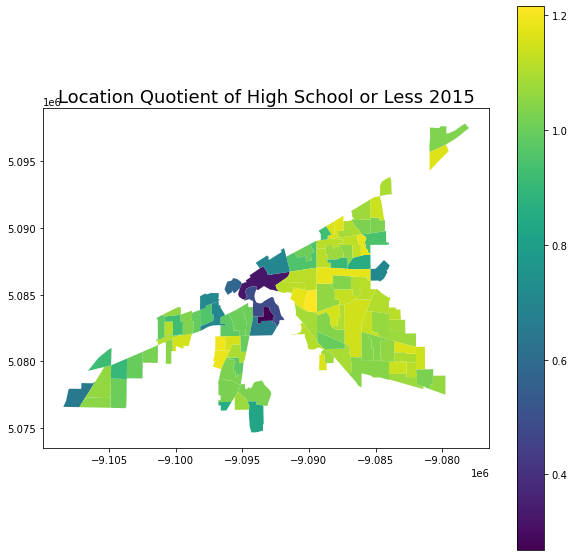

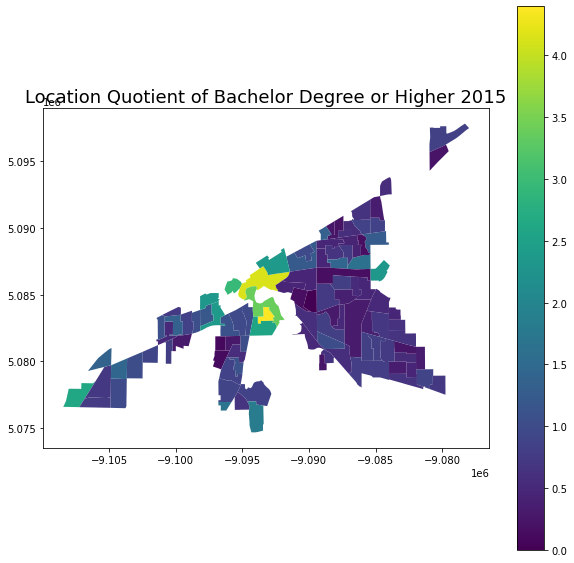

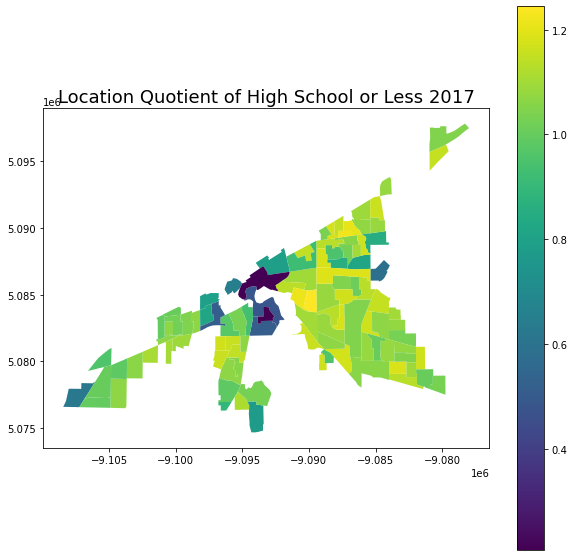

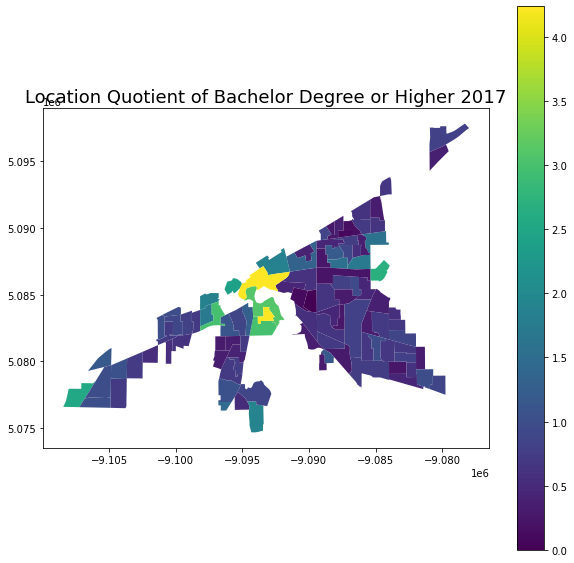

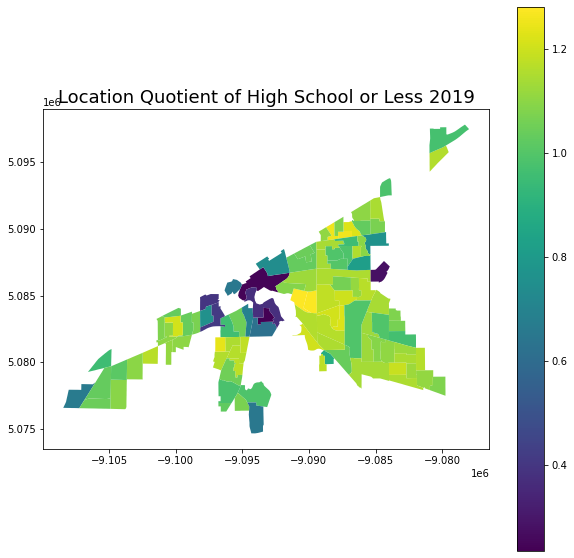

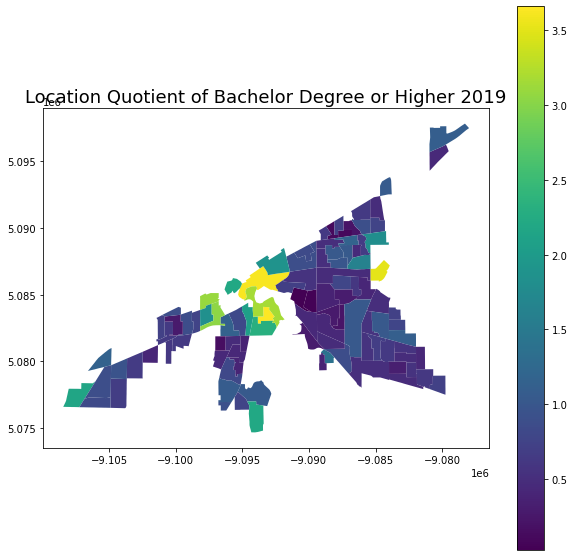

In [69]:
#Education
lqe_stat=[LQ13e_stat,LQ15e_stat,LQ17e_stat,LQ19e_stat]
time= [2013,2015,2017,2019]
for year,time,stat in zip(years,time,lqe_stat): 
    #HS
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.plot(stat[:,0],cmap = 'viridis',legend = True, ax = ax)
    ax.set_title('Location Quotient of High School or Less {}'.format(time), fontsize = 18)
    #BD
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.plot(stat[:,1],cmap = 'viridis',legend = True, ax = ax)
    ax.set_title('Location Quotient of Bachelor Degree or Higher {}'.format(time), fontsize = 18)

In [71]:
#Local Diversity
#race
LD13r = MultiLocalDiversity(ohio13, race)
LD13r_stat = LD13r.statistics

LD15r = MultiLocalDiversity(ohio15, race)
LD15r_stat= LD15r.statistics

LD17r = MultiLocalDiversity(ohio17, race)
LD17r_stat =LD17r.statistics

LD19r = MultiLocalDiversity(ohio19, race)
LD19r_stat = LD19r.statistics
#income
LD13i = MultiLocalDiversity(ohio13, income)
LD13i_stat = LD13i.statistics

LD15i = MultiLocalDiversity(ohio15, income)
LD15i_stat=LD15i.statistics

LD17i = MultiLocalDiversity(ohio17, income)
LD17i_stat =LD17i.statistics

LD19i = MultiLocalDiversity(ohio19, income)
LD19i_stat = LD19i.statistics

#Education
LD13e = MultiLocalDiversity(ohio13, edu)
LD13e_stat =LD13e.statistics

LD15e = MultiLocalDiversity(ohio15, edu)
LD15e_stat =LD15e.statistics

LD17e = MultiLocalDiversity(ohio17, edu)
LD17e_stat =LD17e.statistics

LD19e = MultiLocalDiversity(ohio19, edu)
LD19e_stat = LD19e.statistics

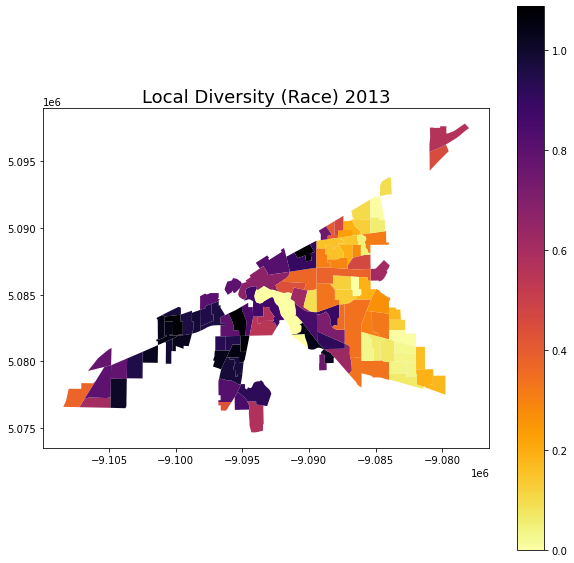

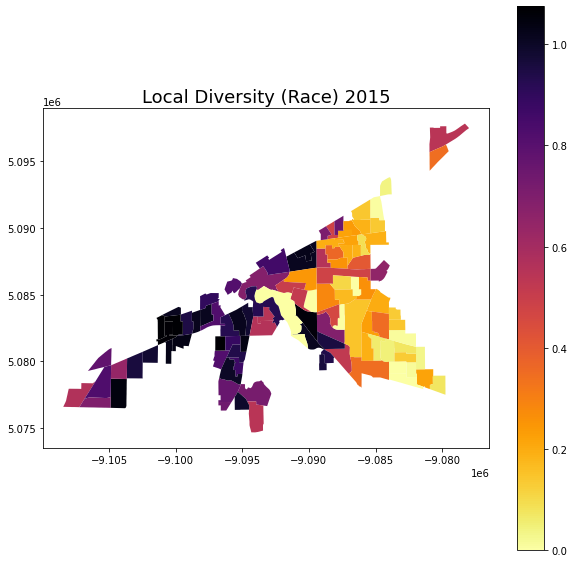

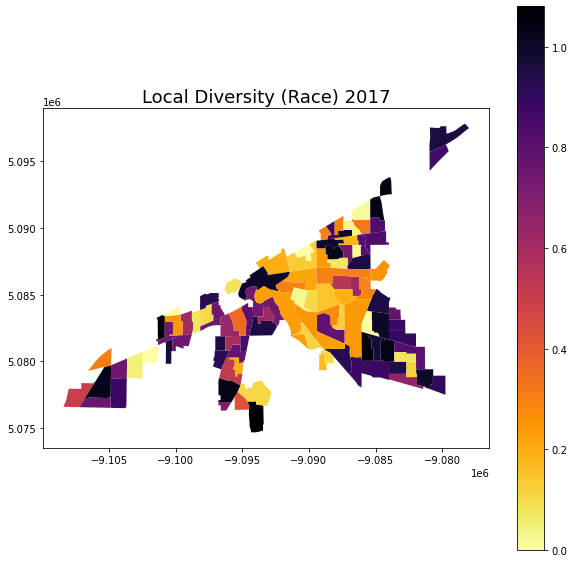

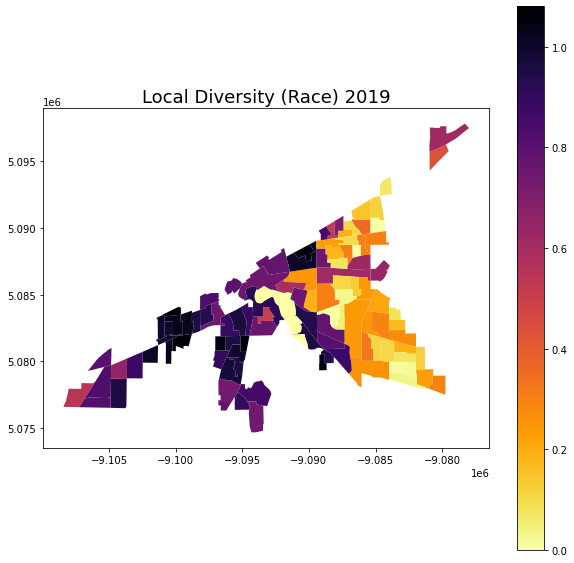

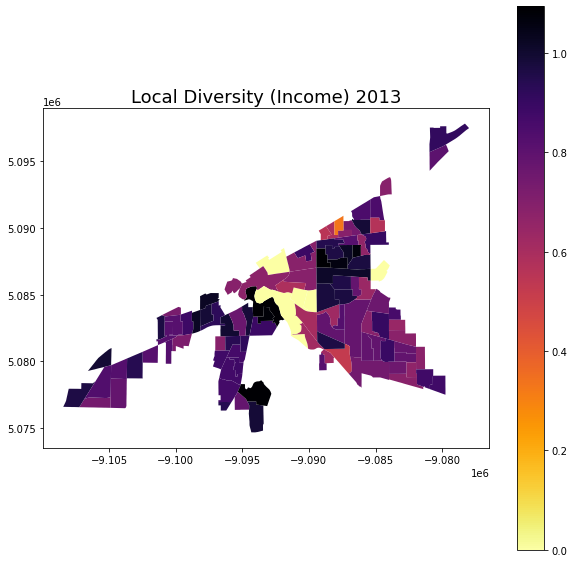

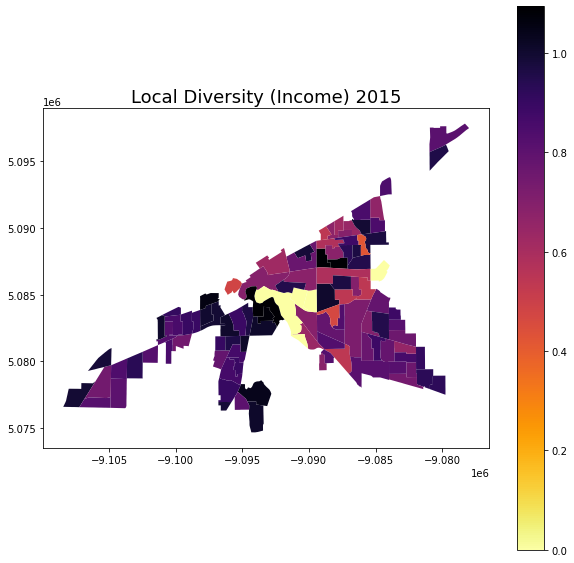

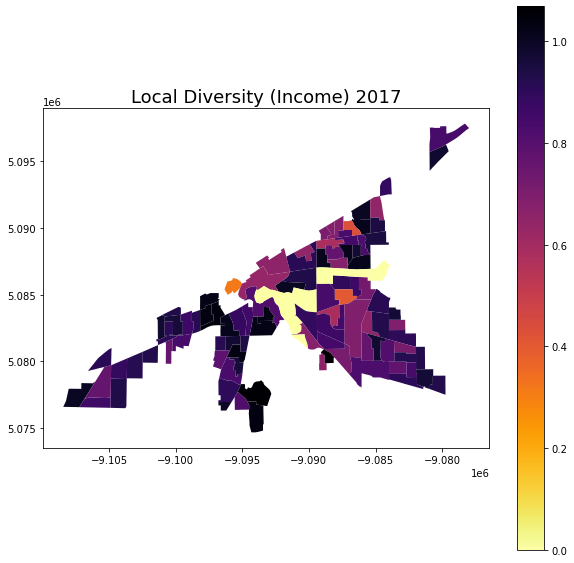

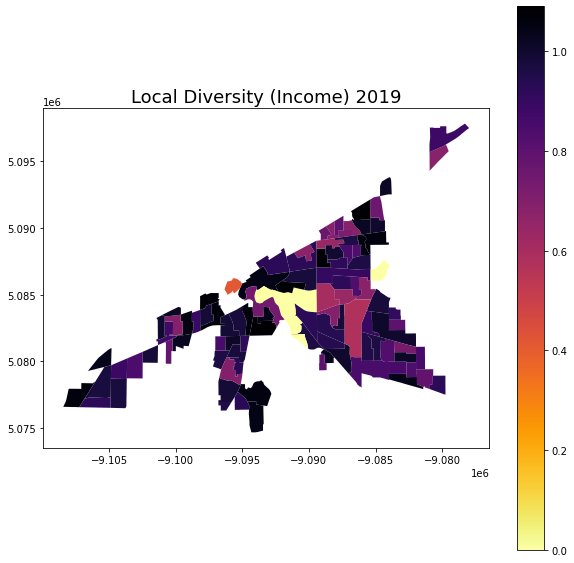

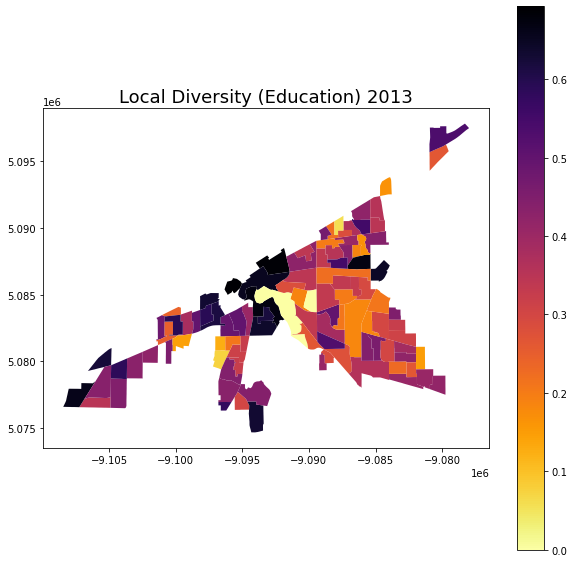

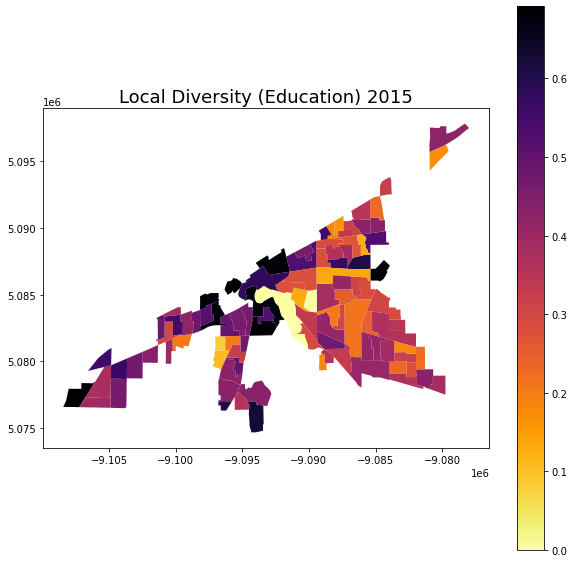

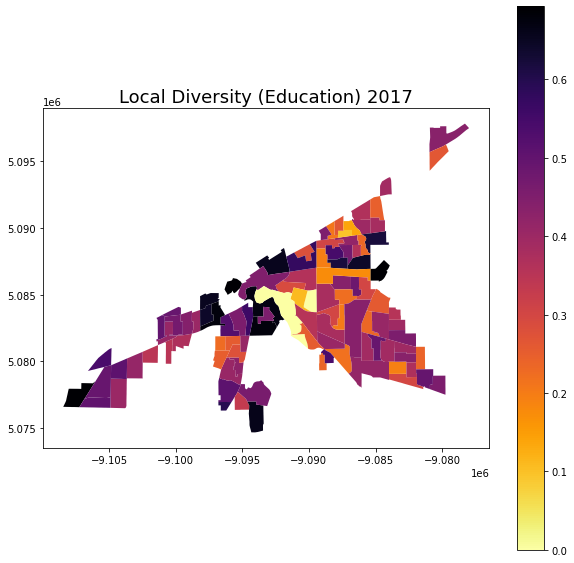

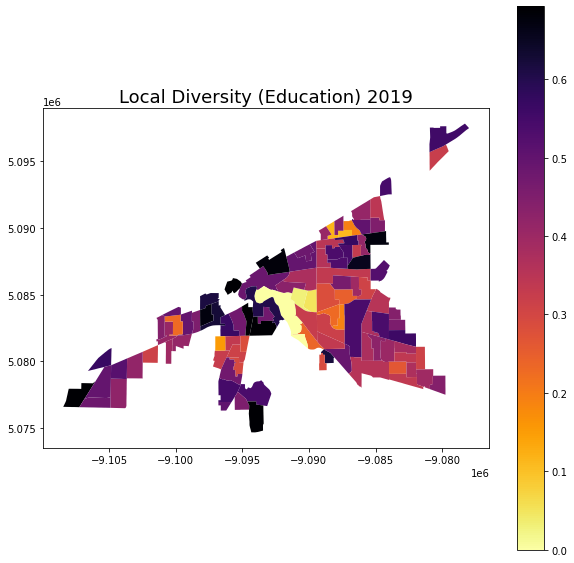

In [76]:
#Race
ldr_stat=[LD13r_stat,LD15r_stat,LD17r_stat,LD19r_stat]
time= [2013,2015,2017,2019]
for year,time,stat in zip(years,time,ldr_stat):
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.plot(stat,cmap = 'inferno_r',legend = True, ax = ax)
    ax.set_title('Local Diversity (Race) {}'.format(time), fontsize = 18)
#Income
ldi_stat=[LD13i_stat,LD15i_stat,LD17i_stat,LD19i_stat]
time= [2013,2015,2017,2019]
for year,time,stat in zip(years,time,ldi_stat):
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.plot(stat,cmap = 'inferno_r',legend = True, ax = ax)
    ax.set_title('Local Diversity (Income) {}'.format(time), fontsize = 18)
#Education
lde_stat=[LD13e_stat,LD15e_stat,LD17e_stat,LD19e_stat]
time= [2013,2015,2017,2019]
for year,time,stat in zip(years,time,lde_stat):
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.plot(stat,cmap = 'inferno_r',legend = True, ax = ax)
    ax.set_title('Local Diversity (Education) {}'.format(time), fontsize = 18)

In [77]:
#Local Entropy
#race
LE13r = MultiLocalEntropy(ohio13, race)
LE13r_stat = LE13r.statistics

LE15r = MultiLocalEntropy(ohio15, race)
LE15r_stat= LE15r.statistics

LE17r = MultiLocalEntropy(ohio19, race)
LE17r_stat =LE17r.statistics

LE19r = MultiLocalEntropy(ohio19, race)
LE19r_stat = LE19r.statistics
#income
LE13i = MultiLocalEntropy(ohio13, income)
LE13i_stat = LE13i.statistics

LE15i = MultiLocalEntropy(ohio15, income)
LE15i_stat=LE15i.statistics

LE17i = MultiLocalEntropy(ohio17, income)
LE17i_stat =LE17i.statistics

LE19i = MultiLocalEntropy(ohio19, income)
LE19i_stat = LE19i.statistics

#Education
LE13e = MultiLocalEntropy(ohio13, edu)
LE13e_stat =LE13e.statistics

LE15e = MultiLocalEntropy(ohio15, edu)
LE15e_stat =LE15e.statistics

LE17e = MultiLocalEntropy(ohio17, edu)
LE17e_stat =LE17e.statistics

LE19e = MultiLocalEntropy(ohio19, edu)
LE19e_stat = LE19e.statistics

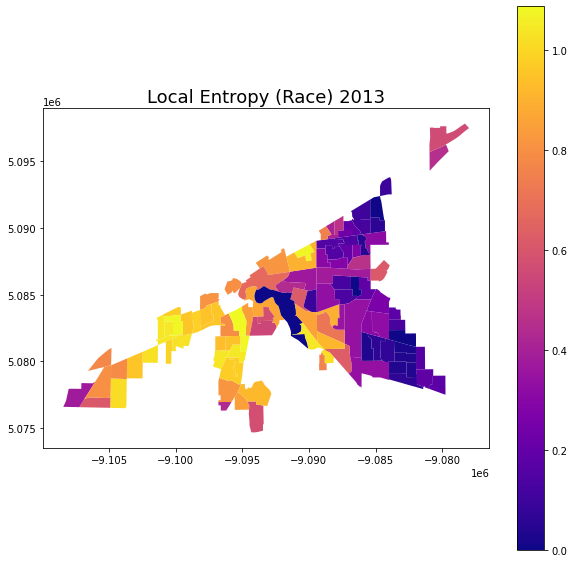

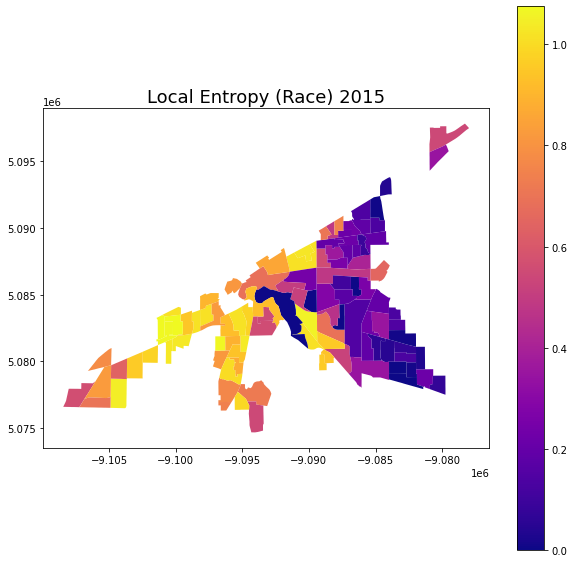

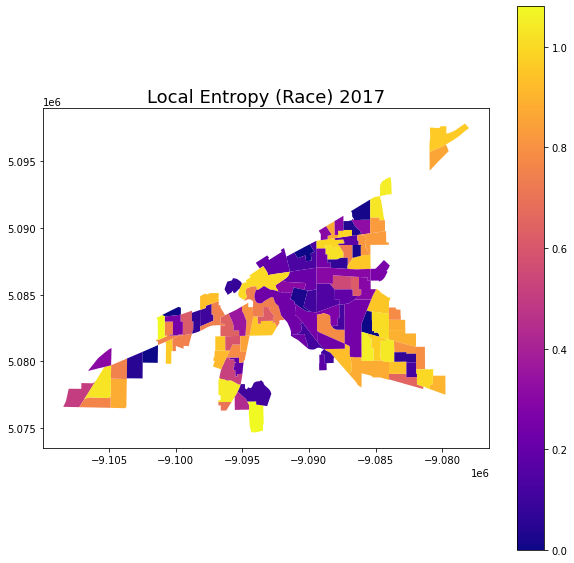

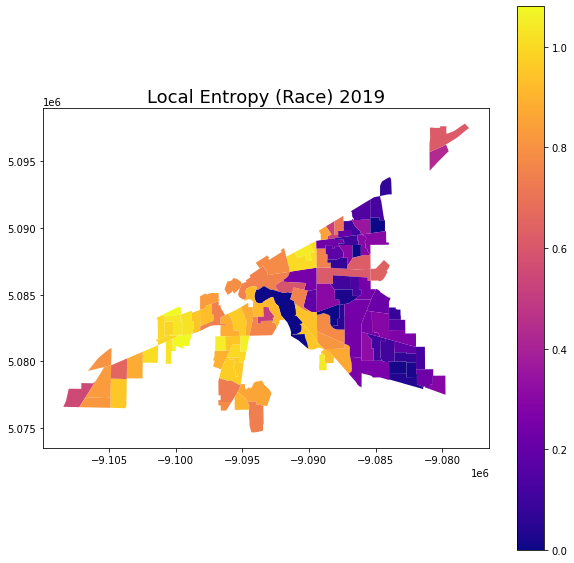

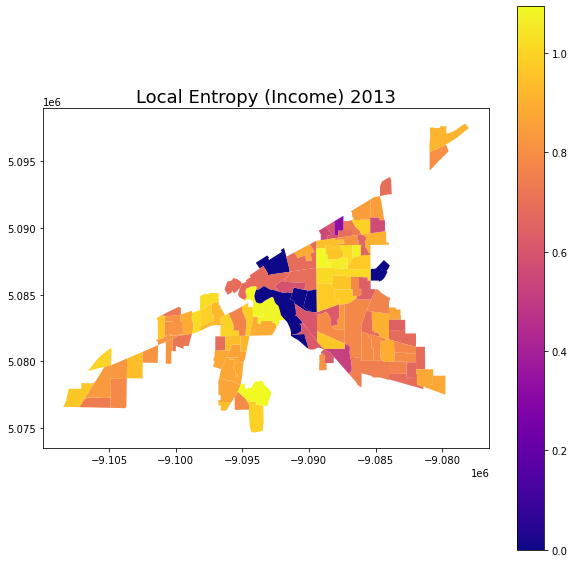

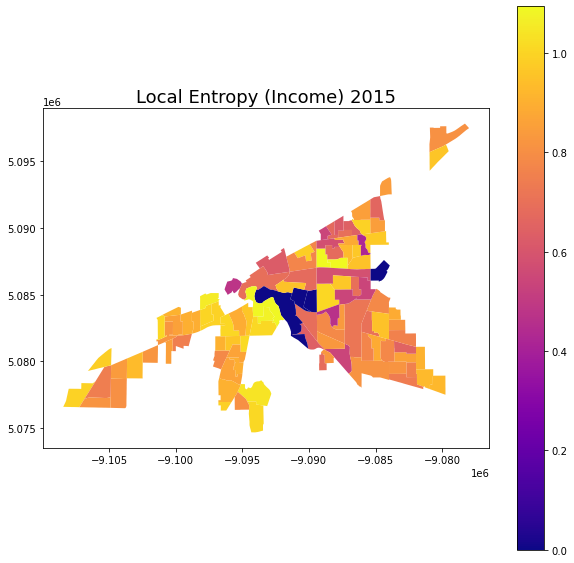

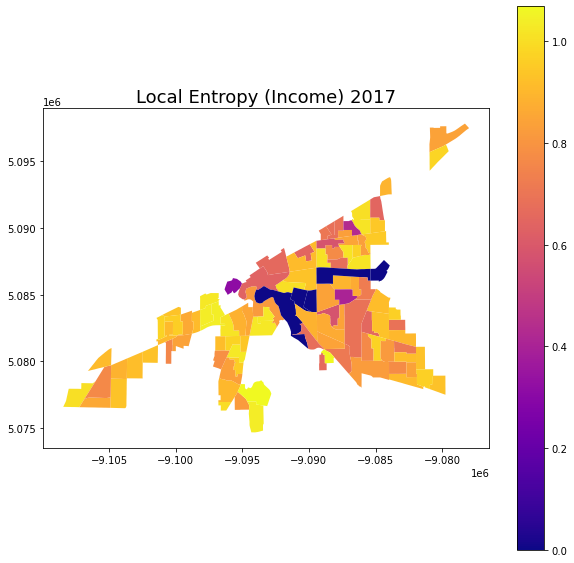

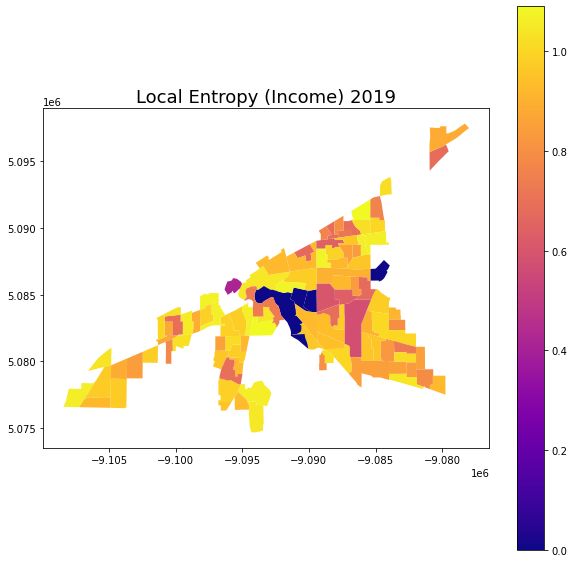

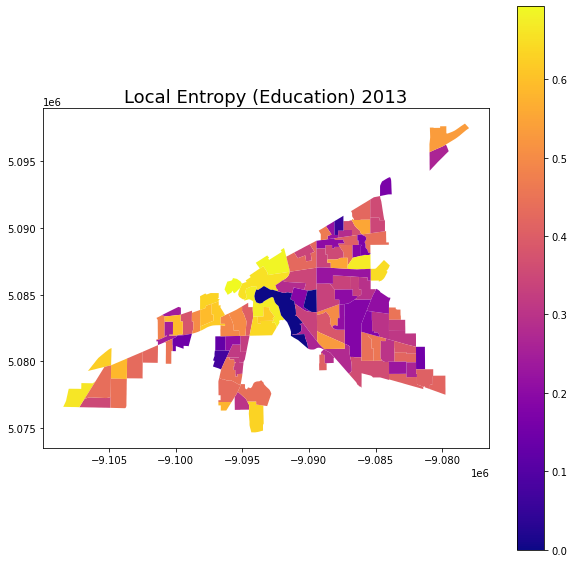

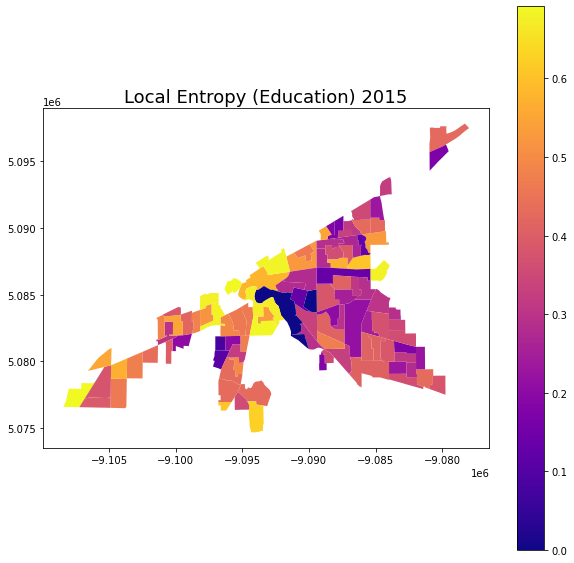

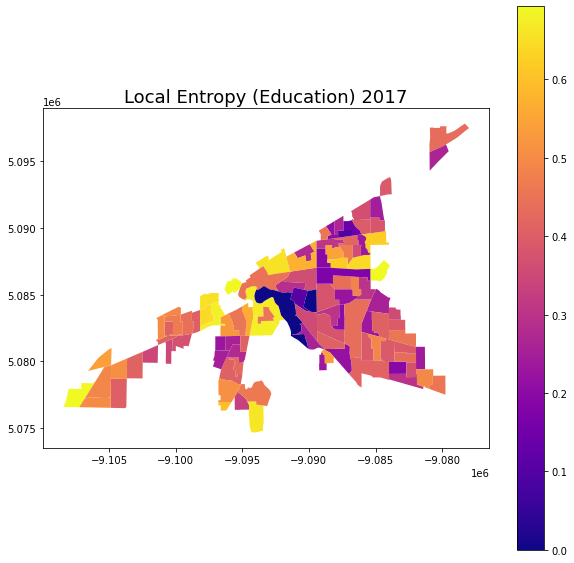

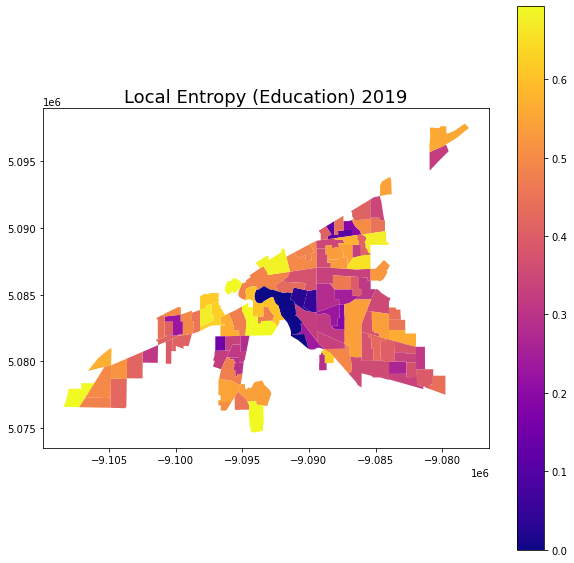

In [79]:
#Race
ler_stat=[LE13r_stat,LE15r_stat,LE17r_stat,LE19r_stat]
time= [2013,2015,2017,2019]
for year,time,stat in zip(years,time,ldr_stat):
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.plot(stat,cmap = 'plasma',legend = True, ax = ax)
    ax.set_title('Local Entropy (Race) {}'.format(time), fontsize = 18)
#Income
lei_stat=[LE13i_stat,LE15i_stat,LE17i_stat,LE19i_stat]
time= [2013,2015,2017,2019]
for year,time,stat in zip(years,time,ldi_stat):
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.plot(stat,cmap = 'plasma',legend = True, ax = ax)
    ax.set_title('Local Entropy (Income) {}'.format(time), fontsize = 18)
#Education
lee_stat=[LE13e_stat,LE15e_stat,LE17e_stat,LE19e_stat]
time= [2013,2015,2017,2019]
for year,time,stat in zip(years,time,lde_stat):
    f, ax = plt.subplots(1,1,figsize=(8,8))
    year.plot(stat,cmap = 'plasma',legend = True, ax = ax)
    ax.set_title('Local Entropy (Education) {}'.format(time), fontsize = 18)